**<font size=6> HPT Visualizer**  

# Introduction

Hyperparameter Tuning is based on [Optuna](https://optuna.org/). In this Python module the algorithm used to find the optimal set of hyperparameters is the Tree-Parzen Estimator. Ro keep it simple, the Tree-Parzen Estimator is based on the idea of Bayesian optimization, which involves iteratively sampling the hyperparameter space and updating a probabilistic model to guide the search towards promising regions of the space.

To use Optuna for hyperparameter optimization, we first define the hyperparameter space and the objective function, and then create a study object. We then call the study's optimize method to begin the optimization process. The optimize method will repeatedly call the objective function with different hyperparameter configurations, using the sampler to generate the configurations and the pruner to decide whether to terminate a trial early. The optimize method will return the best hyperparameter configuration found by the optimization process.

Note that one **study** refers to one run of HPT and that one study is composed of several **trials** where each trial corresponds to one specific set of hyperparameters.

# User-input

Please set `STUDY_FILEPATH_INPUT` to the path of the `.db` file containing the *Optuna* study of intereset.  Example: `STUDY_FILEPATH_INPUT = "hpt_studies/hpt_study-0.db"`.

In [1]:
from pathlib import Path
STUDY_FILEPATH_INPUT = "hpt_studies/hpt_study-0.db"
STUDY_FILEPATH = Path(STUDY_FILEPATH_INPUT)

assert STUDY_FILEPATH_INPUT, "Please set STUDY_FILEPATH_INPUT."

# Imports

In [2]:
import yaml
import optuna
from optuna.visualization import (plot_contour,
                                  plot_edf,
                                  plot_intermediate_values,
                                  plot_optimization_history,
                                  plot_parallel_coordinate,
                                  plot_param_importances,
                                  plot_slice)


# --- READ YAML CONFIG ---
with open("hpt_config.yaml", "r") as f:
    hpt_config = yaml.safe_load(f)

study_name = hpt_config["study_name"]

In [3]:
with open(STUDY_FILEPATH, "rb") as f:
    study = optuna.load_study(
        study_name=study_name,
        storage=f"sqlite:///{STUDY_FILEPATH}")

print(f"Study '{STUDY_FILEPATH}' successfully loaded.")

Study 'hpt_studies/hpt_study-0.db' successfully loaded.


# Study results

In [4]:
print("Best trial until now:")
print(" Value: ", study.best_trial.value)
print(" Params: ")
for key, value in study.best_trial.params.items():
    print(f"    {key}: {value}")

Best trial until now:
 Value:  0.7195121049880981
 Params: 
    dropout: 0.30000000000000004
    embedding_dim: 1024
    intermediate_ff_block_units: [512, 256]


# Visualization

Visualize the optimization history.

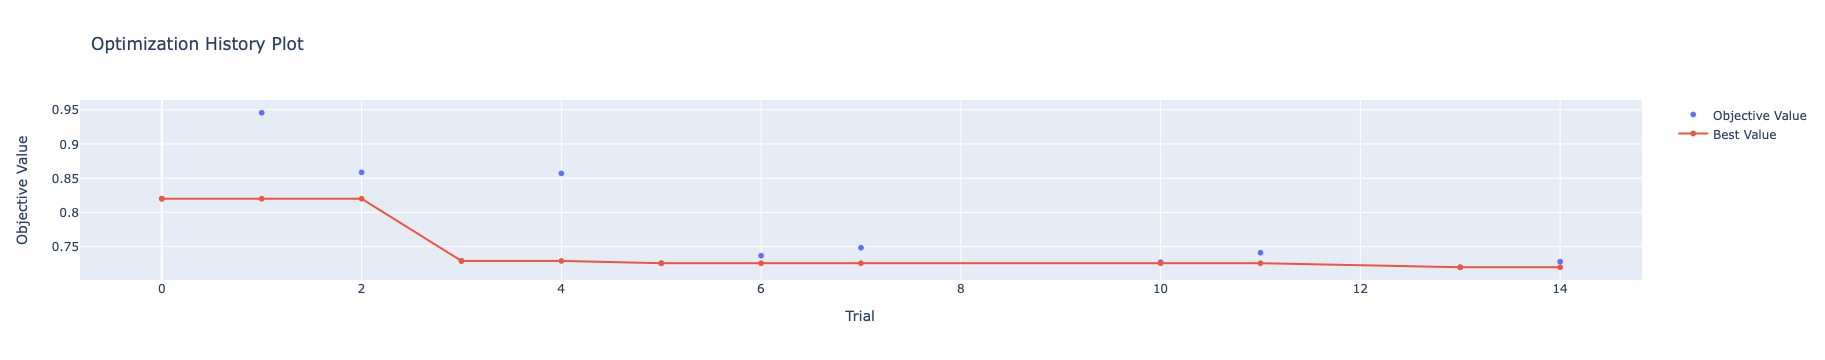

In [5]:
plot_optimization_history(study)

Visualize the learning curves of the trials.

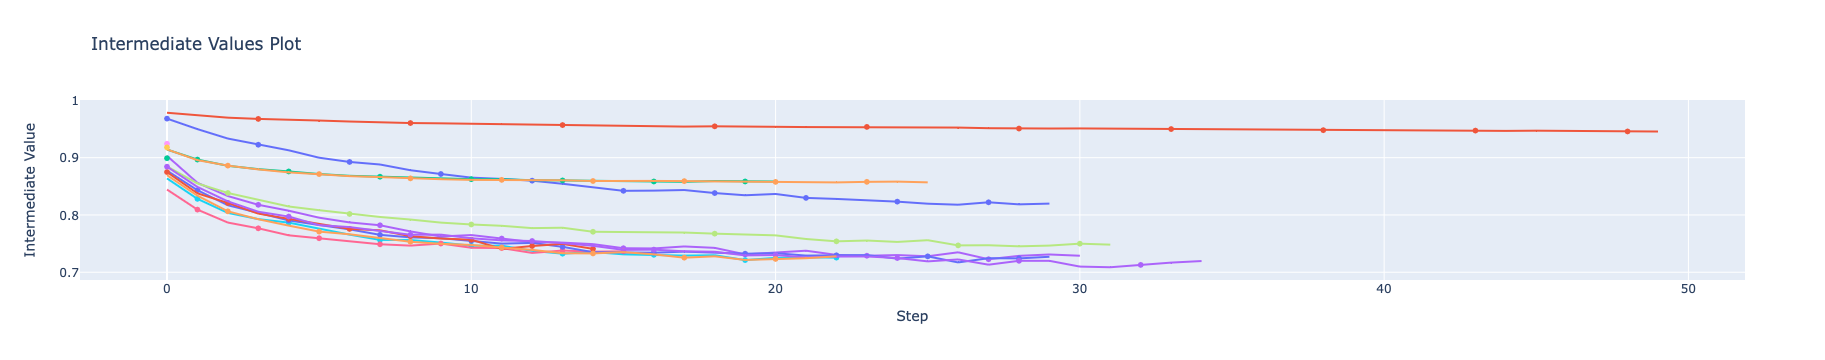

In [6]:
plot_intermediate_values(study)

Visualize individual hyperparameters as slice plot.

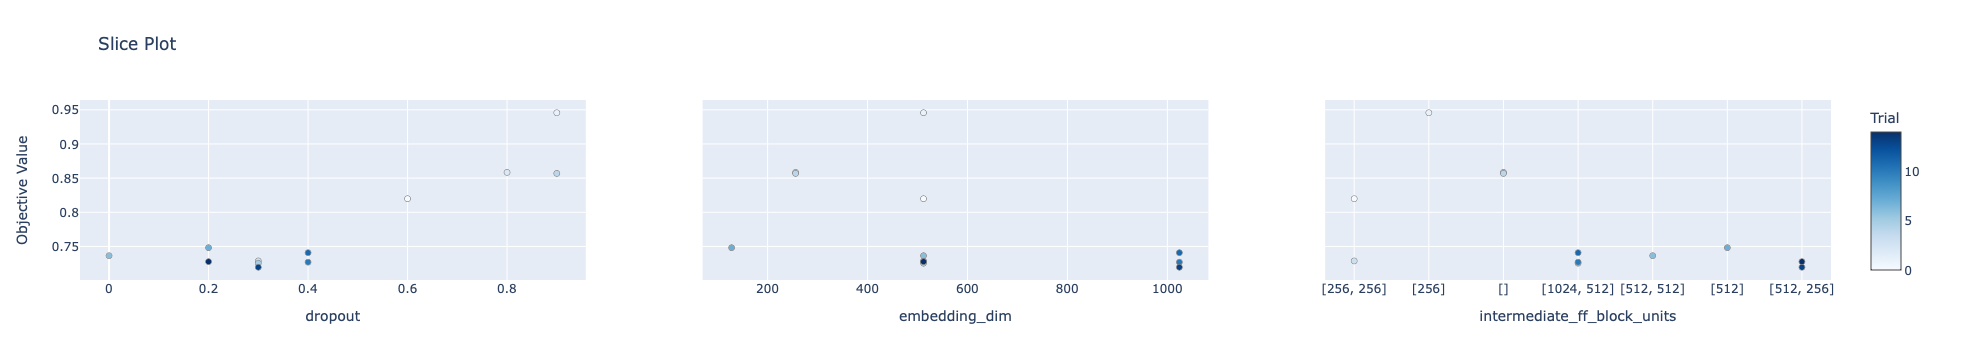

In [7]:
plot_slice(study)

Visualize high-dimensional parameter relationships.

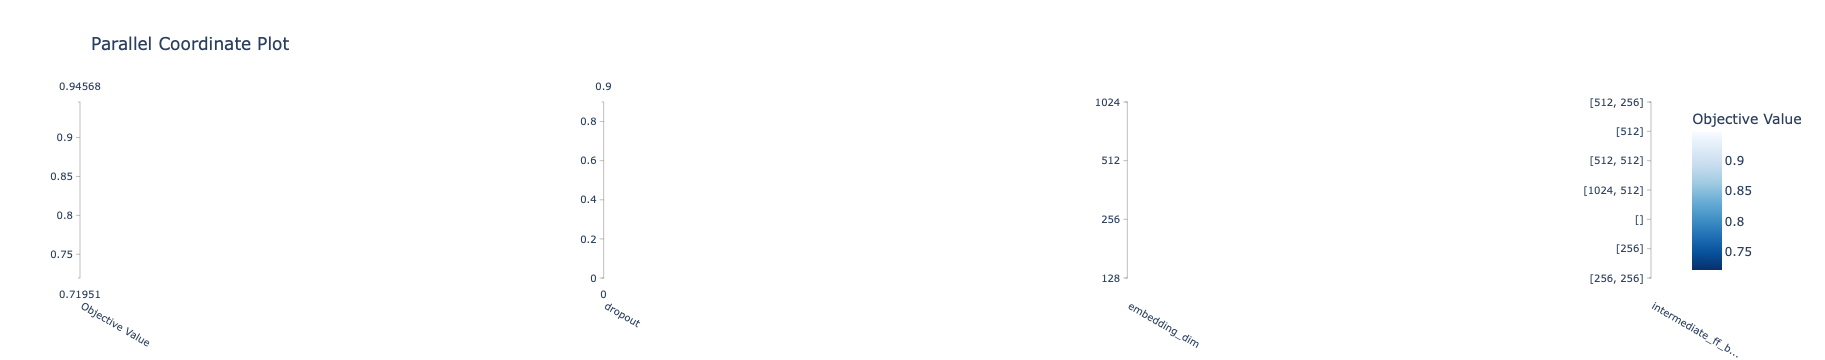

In [8]:
plot_parallel_coordinate(study)

Visualize hyperparameter relationships.

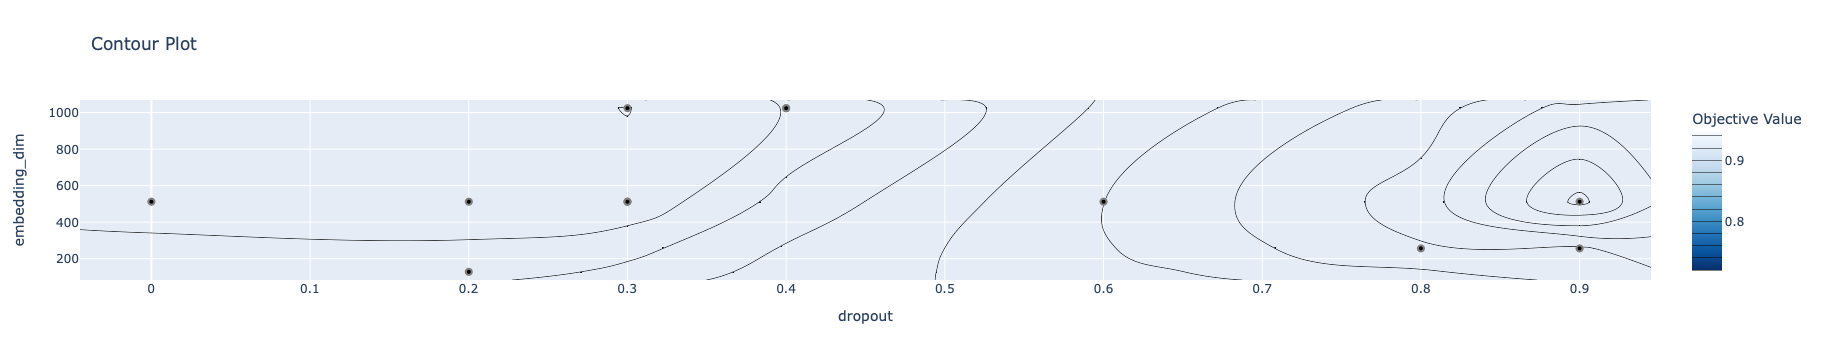

In [13]:
LIST_PARAMS = ["embedding_dim", "dropout"]

plot_contour(study, params=LIST_PARAMS)

Visualize parameter importances.

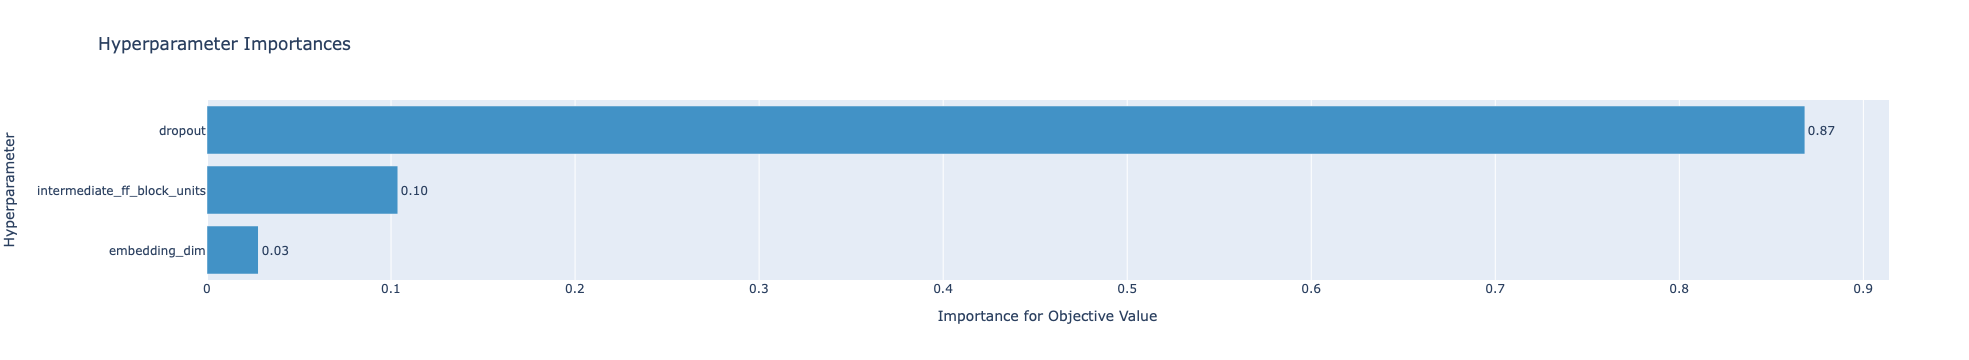

In [10]:
plot_param_importances(study)

Learn which hyperparameters are affecting the trial duration with hyperparameter importance.

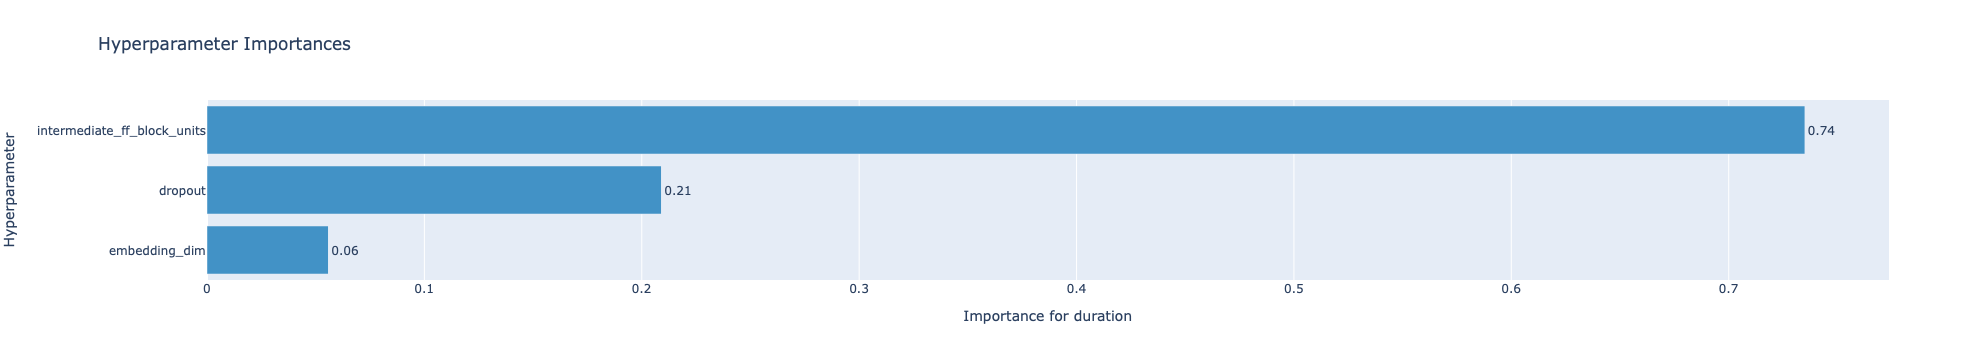

In [11]:
optuna.visualization.plot_param_importances(
    study, target=lambda t: t.duration.total_seconds(), target_name="duration"
)

# Export table will all trials

In [12]:
COLS_OF_INTEREST = [
    "value",
    "params_dropout",
    "params_embedding_dim",
    "params_intermediate_ff_block_units",
]

MAPPING_COLUMNS = {
    "value": "loss",
    "params_dropout": "dropout",
    "params_embedding_dim": "embedding_dim",
    "params_intermediate_ff_block_units": "intermediate_ff_block_units"
}

df_results = study.trials_dataframe()[COLS_OF_INTEREST]
df_results["value"] = df_results["value"].round(3)
df_results = df_results.rename(columns=MAPPING_COLUMNS)

markdown_filepath = f"{STUDY_FILEPATH.parent}/{STUDY_FILEPATH.stem}.md"
df_results.to_markdown(markdown_filepath)

print(f"Table successfully saved at `{markdown_filepath}`.")

df_results

Table successfully saved at `hpt_studies/hpt_study-0.md`.


loss  dropout  embedding_dim intermediate_ff_block_units
0   0.820      0.6            512                  [256, 256]
1   0.946      0.9            512                       [256]
2   0.858      0.8            256                          []
3   0.729      0.3            512                  [256, 256]
4   0.857      0.9            256                          []
5   0.725      0.3            512                 [1024, 512]
6   0.736      0.0            512                  [512, 512]
7   0.748      0.2            128                       [512]
8   0.924      0.7           1024                       [512]
9   0.918      0.0            128                          []
10  0.727      0.4           1024                 [1024, 512]
11  0.741      0.4           1024                 [1024, 512]
12  0.899      0.5           1024                 [1024, 512]
13  0.720      0.3           1024                  [512, 256]
14  0.728      0.2            512                  [512, 256]